# Examen Parcial:

Para ejecutar el código: crear un kernel en la competencia de kaggle (https://www.kaggle.com/c/facial-keypoints-detection) y partir de este notebook. Una vez terminado, se debe descargar el notebook final y subirlo en paideia.


## Descripcion de la tarea

El objetivo de esta tarea es predecir las posiciones de los puntos clave en imágenes de rostros.

Las imágenes de entrada son de 96x96 píxeles y en escala de grises (descritas con números enteros entre 0 y 255).

Cada punto clave se especifica mediante un par de valores reales (x, y) en el espacio de los índices de píxeles. Hay 15 puntos clave, que representan los siguientes elementos de la cara:

    left_eye_center, right_eye_center, left_eye_inner_corner, left_eye_outer_corner, right_eye_inner_corner, right_eye_outer_corner, left_eyebrow_inner_end, left_eyebrow_outer_end, right_eyebrow_inner_end, right_eyebrow_outer_end, nose_tip, mouth_left_corner, mouth_right_corner, mouth_center_top_lip, mouth_center_bottom_lip

De modo que se debe entrenar una red neuronal que tome como input la imagen en escala de grises y de como output 30 números (las coordenadas x,y de los 15 puntos claves).

Al compilar el modelo, especificar como función de pérdida el mean squared error **(mse)** y como métrica el mean absolute error **(mae)**. Por ejemplo:
``` python
model.compile(Adam(lr), loss='mse', metrics=['mae'])
```

## Calificación

- Normalizar las imágenes (1 pt)
- Definir correctamente la red neuronal (4 pts)
- Entrenar la red neuronal (2 pts)
  - mae entre 10 y 15 (3 pts)
  - mae entre 8 y 11 (5 pts)
  - mae entre 5 y 8 (7 pts)
  - mae menor o igual a 4.0 (9 pts)
- Mostrar 5 resultados aleatorios del set de validación (1 pt)
- Mostrar las 5 mejores predicciones del set de validación (1 pt)
- Mostrar las 5 peores predicciones del set de validación (1 pt)

## Recomendaciones

Activar el uso de GPU en el kernel de kaggle.

Dentro del kernel de kaggle, los botones para bajar y subir kernels, se encuentran en la parte superior de la pagina, a la izquierda del boton commit.

![](https://i.imgur.com/m4inkg3.png)

# Lectura de datos

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../input/training/training.csv')
df.dropna(inplace=True)
df.shape

(2140, 31)

In [3]:
from joblib import Parallel, delayed

def format_img(x):
    return np.asarray([int(e) for e in x.split(' ')], dtype=np.uint8).reshape(96,96)

with Parallel(n_jobs=10, verbose=1, prefer='threads') as ex:
    x = ex(delayed(format_img)(e) for e in df.Image)
    
x = np.stack(x)[..., None]
x.shape

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    1.0s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    2.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    3.7s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    5.0s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    6.7s
[Parallel(n_jobs=10)]: Done 2140 out of 2140 | elapsed:    7.7s finished


(2140, 96, 96, 1)

In [4]:
y = df.iloc[:, :-1].values
y.shape

(2140, 30)

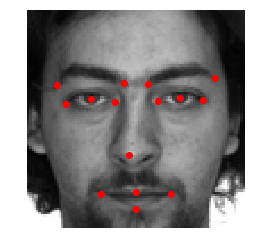

In [5]:
def show(x, y=None):
    plt.imshow(x[..., 0], 'gray')
    if y is not None:
        points = np.vstack(np.split(y, 15)).T
        plt.plot(points[0], points[1], 'o', color='red')
        
    plt.axis('off')

sample_idx = np.random.choice(len(x))    
show(x[sample_idx], y[sample_idx])

# Train validation split

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_val.shape

((1712, 96, 96, 1), (428, 96, 96, 1))

In [ ]:
# Normalizar las imágenes (1pt)


# Model

In [ ]:
# Definir correctamente la red neuronal (5 pts)



In [ ]:
# Entrenar la red neuronal (2 pts)


In [ ]:
# Resultado del entrenamiento
# - mae entre 10 y 15 (3 pts)
# - mae entre 8 y 11 (5 pts)
# - mae entre 5 y 8 (7 pts)
# - mae menor o igual a 4.0 (9 pts)

print(f'MAE final: {model.evaluate(x_val, y_val)[1]}')

In [ ]:
# Ver la perdida en el entrenamiento
def show_results(*logs):
    trn_loss, val_loss, trn_acc, val_acc = [], [], [], []
    
    for log in logs:
        trn_loss += log.history['loss']
        val_loss += log.history['val_loss']
    
    fig, ax = plt.subplots(figsize=(8,4))
    ax.plot(trn_loss, label='train')
    ax.plot(val_loss, label='validation')
    ax.set_xlabel('epoch'); ax.set_ylabel('loss')
    ax.legend()
    
show_results(log)

# Resultados

In [ ]:
# Función para visualizar un resultado
def show_pred(x, y_real, y_pred):
    fig, axes = plt.subplots(1, 2, figsize=(10,5))
    for ax in axes:
        ax.imshow(x[0, ..., 0], 'gray')
        ax.axis('off')
        
    points_real = np.vstack(np.split(y_real[0], 15)).T
    points_pred = np.vstack(np.split(y_pred[0], 15)).T
    axes[0].plot(points_pred[0], points_pred[1], 'o', color='red')
    axes[0].set_title('Predictions', size=16)
    axes[1].plot(points_real[0], points_real[1], 'o', color='green')
    axes[1].plot(points_pred[0], points_pred[1], 'o', color='red', alpha=0.5)
    axes[1].set_title('Real', size=16)

Ej:
``` python
sample_x = x_val[0, None]
sample_y = y_val[0, None]
pred = model.predict(sample_x)
show_pred(sample_x, sample_y, pred)
```

In [ ]:
# Mostrar 5 resultados aleatorios del set de validación (1 pt)


In [ ]:
# Mostrar las 5 mejores predicciones del set de validación (1 pt)


In [ ]:
# Mostrar las 5 peores predicciones del set de validación (1 pt)
